# N10 formula and basic modeling

When doing statistics, data is analyzed, and values created. The real power of statistics is building models, and fitting data to those models. The models are later used to understand complex systems, and make predictions.

This notebook will cover the simpliest model, the linear model. The linear model assumes an equation in the form:

Y = A + B0\*V0 + B1\*V1 + B2\*V2 .... + e



In this model mechanism, Y is the dependent variable, and V0, V1, V2 are independent variables. A is the intercept, and e represents an error term from the modeled Y to the actual Y. The goal of the statistics software is to minize the total error in the result. As an example, consider the mtcars data frame:

In [3]:
names(mtcars)

[1] "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"   "gear"
[11] "carb"

Create a hypothesis, or model assumption that mpg depends on disp, hp, and wt (displacement, horsepower, and weight). This is done with a new syntax. It creates an equation or formula. This is used by the optimization software to find the dependent and independent variables:

mpg ~ disp + hp + wt

Note that the '+' does not mean add, it simply implies the variable that will be used in the model fitting optimization.

In [4]:
model1 <- mpg ~ disp + hp + wt

The equation was assigned to a variable in this instance. This equation can then be used to find a model fit. For the first notebook the model will be a linear model 'lm' using the equation above.

In [18]:
bob<-lm(model1,mtcars)
"Now, print the result"
bob
"Just the first element"
bob[1]
'You can get the coefficients by name using $'
bob$coefficients[1]
'You can get the items by name using the vector indexed with the string'
bob$coefficients["disp"]

[1] "Now, print the result"


Call:
lm(formula = model1, data = mtcars)

Coefficients:
(Intercept)         disp           hp           wt  
  37.105505    -0.000937    -0.031157    -3.800891  


[1] "Just the first element"

$coefficients
  (Intercept)          disp            hp            wt 
37.1055052690 -0.0009370091 -0.0311565508 -3.8008905826

[1] "You can get the coefficients by name using $"

(Intercept) 
   37.10551

[1] "You can get the items by name using the vector indexed with the string"

disp 
-0.0009370091

The results are an equation that 'best' fits the data.

mpg = 37.1055+(-0.00937)\*disp+(-0.031157)\*hp+(-3.800891)\*wt

The values can be accessed by getting the list elements from the $coefficients or first element of 'bob'

The second element in the results are the residuals, or error term e for each data entry:

In [34]:
bob[2]
class(bob[2])

$residuals
          Mazda RX4       Mazda RX4 Wag          Datsun 710      Hornet 4 Drive 
         -2.5700299          -1.6008028          -2.4886829           0.1833269 
  Hornet Sportabout             Valiant          Duster 360           Merc 240D 
          0.4592780          -2.3721590          -1.2656477           1.4885011 
           Merc 230            Merc 280           Merc 280C          Merc 450SE 
          0.7591033          -0.8411432          -2.2411432           0.6307257 
         Merc 450SL         Merc 450SLC  Cadillac Fleetwood Lincoln Continental 
          0.2384229          -1.6715326           0.0785315           1.0402079 
  Chrysler Imperial            Fiat 128         Honda Civic      Toyota Corolla 
          5.4885456           5.7865290           1.1240053           5.8609261 
      Toyota Corona    Dodge Challenger         AMC Javelin          Camaro Z28 
         -3.1015898          -3.2549189          -3.8911127          -1.2487773 
   Pontiac Firebird           Fiat X1-9       Porsche 914-2        Lotus Europa 
          2.5361190          -0.3204259          -0.0236311           2.6550420 
     Ford Pantera L        Ferrari Dino       Maserati Bora          Volvo 142E 
         -0.7024625          -1.2887756           2.1831584          -1.6295873

[1] "list"

You can see that the data fits reasonably well in many cases, but not all. It is often good to get a 'summary' of the error terms to see how well things worked. Convert the list to a vector with the handy 'unlist' function. 

In [40]:
sally <- unlist(bob[2])
class(sally)
summary(sally)

[1] "numeric"

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -3.891  -1.640  -0.172   0.000   1.061   5.861 

This shows that the model is off by most ~-4 to 6 mpg. The first and third quartiles are off by about 1.5 mpg. Not a great fit, but not too bad.

The values of disp, hp, and wt don't have the same units. Display a line of the mtcars to see the typical units.

In [30]:
mtcars[2,]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4


[1] "list"

The displacement is in cubic inches, the hp in units of one, but the weight appears to be in thousands of pounds.

Make a model function. I used the sum function to get the sum of the vector multiplication. Since the first element is a constant, 1.0 was placed there. This will be multiplied with the intercept. The second variable disp will be multiplied by the B0 term, and so on to the vector length.

In [42]:
mpgmodel <- function(disp,hp,wt) { sum(unlist(bob[1])*c(1.0,disp,hp,wt))}

In [44]:
mpgmodel(160,110,2.9)

[1] 22.50578

A plot is nice. Let's run it from 2000 to 4000 pounds. It needs a floating point number, so use the 'seq' function to get a sequence with an increment. (Here 0.1)

[1] 0.0 0.2 0.4 0.6 0.8 1.0

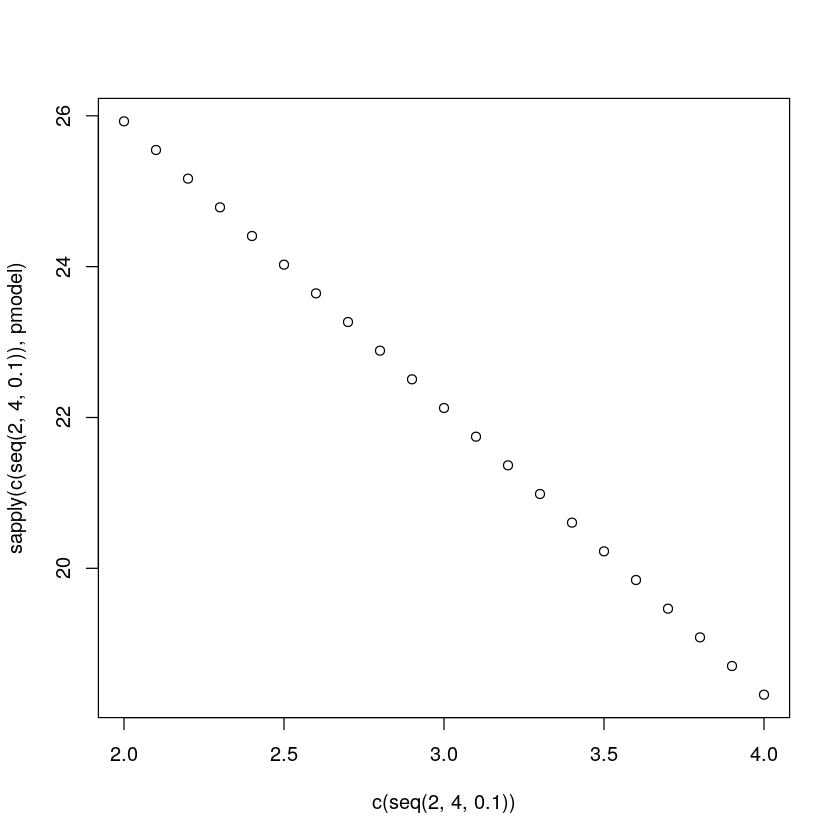

In [64]:
seq(0,1,0.2)
pmodel <- function(x) { mpgmodel(160,110,x)}
plot(c(seq(2.0,4.0,0.1)),sapply(c(seq(2.0,4.0,0.1)),pmodel))

You can see it is a straight line. The line comes from the linear model. Take a look at the error terms. (Get a list by unlist on the second element of the lm result)

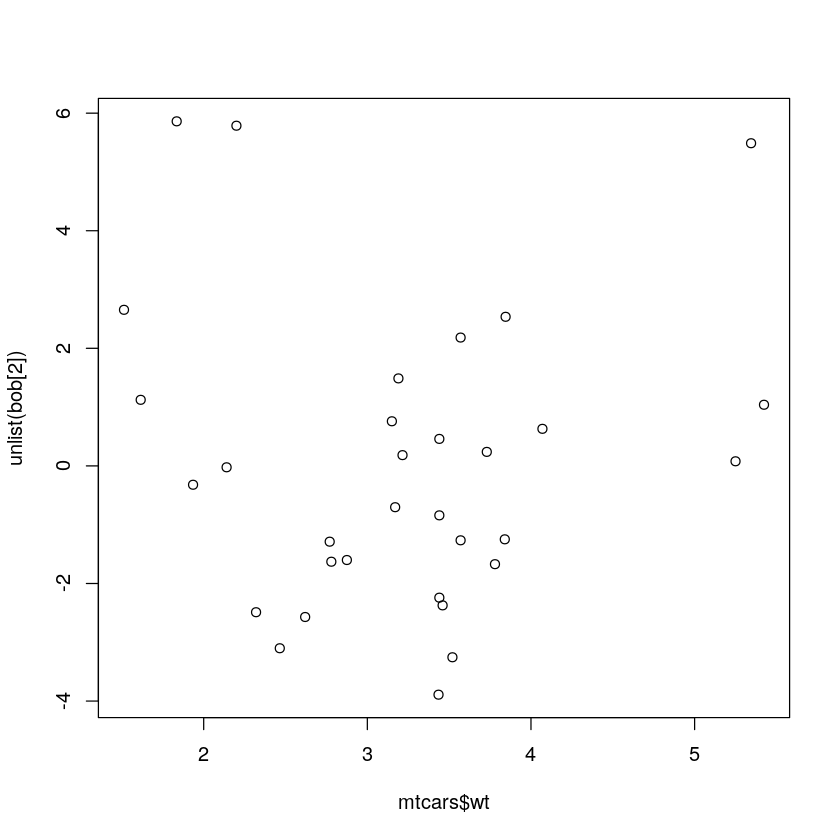

In [62]:
plot(mtcars$wt,unlist(bob[2]))

No clear pattern can be seen.

Try a correlation of mtcars, and look for the highest correlating items to mpg.

In [63]:
cor(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


Cyl and wt are the two highest correlating items. (Correlation assumes a linear relationship, and fits the lm well). As an exercise, create an equation with mpg as the dependent variable, and get a summary of the error terms.

In [7]:
# exercise goes here
#Here mpg is a dependent variable to cyl
mpg.equation <- mpg ~ cyl + drat

#Created a model for given equation to establish some relation between mpg and cyl
mpg.linearModel <- lm(mpg.equation,mtcars)

#Provides the values of coefficients, which can be plugged in to the linear model for 
#different values of independent variables(like wt in previous case)
mpg.linearModel$coefficients

#Provides summary of error/residual terms 
summary(mpg.linearModel$residuals)

#Results are not so nice since the distribution is widespread between -5 to 7

(Intercept)         cyl        drat 
  28.724665   -2.483514    1.871983

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-5.0845 -2.1061 -0.3432  0.0000  1.8000  7.2096 

To submit the results, first save the notebook, then on the JUPYTER, not the browser file area, click print preview. This will result in a nice html image. You can screen capture that, or use the browser print feature to print to a pdf file. (This will depend on how your PC is set up). Upload the results to Canvas.